In [397]:
import numpy as np
import healpy as hp
import astropy
from astropy.io import ascii
from astropy.io import fits
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.table import Table
from astropy.table import Table, Column
import pylab
from pylab import plot
from astropy import cosmology
from astropy.cosmology import WMAP9 as cosmo
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
from matplotlib_venn import venn3, venn3_circles
%matplotlib inline
%config InlineBackend.figure_format='svg'
%config InlineBackend.figure_format='retina' 

In [398]:
print 'Reading files'
w = Table.read('new_wen.fits') 
r = Table.read('new_rykoff.fits') 
k = Table.read('new_koester.fits')
wz = Table.read('new_wazp.fits')
print 'Wen:',len(w)
print 'Rykoff:',len(r)
print 'Koester:', len(k)
print 'Wzap:', len(wz)

Reading files
Wen: 1805
Rykoff: 497
Koester: 260
Wzap: 15880


In [399]:
print("\033[43;30mValores de Ra, Dec e z de cada catalogo\033[m")
c_w = SkyCoord(ra = w['RAJ2000']*u.degree, dec = w['DEJ2000']*u.deg, distance = cosmo.comoving_distance(w['zph'])) 
c_r = SkyCoord(ra = r['RA']*u.deg, dec = r['DEC']*u.deg, distance = cosmo.comoving_distance(r['Z_LAMBDA']))
c_k = SkyCoord(ra = k['RAJ2000'], dec = k['DEJ2000'], distance = cosmo.comoving_distance(k['zph']))
c_wz = SkyCoord(ra = wz['ra']*u.deg, dec = wz['dec']*u.deg, distance = cosmo.comoving_distance(wz['zp']))

Valores de Ra, Dec e z de cada catalogo


# Comparando os catalogos sem limite do z

# Match do Wen com o Rykoff

In [400]:
# Função distlim
# Acha a distribuição de indices por raio
lista_i = []
lista_r = []
for i in range(0,101000,10000):
    idxc_w, idxc_r, d2d, d3d = c_r.search_around_3d(c_w, i*u.kpc)
    lista_i.append(len(idxc_w))
    lista_r.append(i)

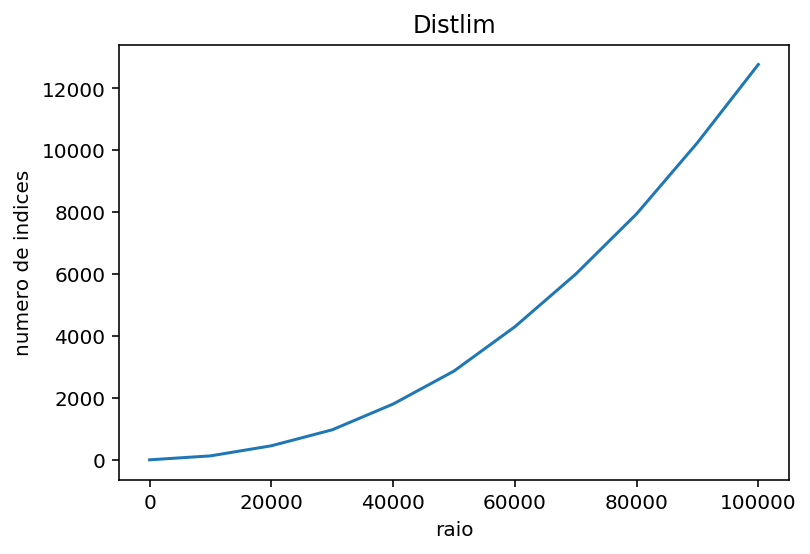

In [401]:
# Plot da função distlim
fig = plt.figure(1)
ax = fig.add_subplot(111)
plt. plot(lista_r,lista_i)
plt.ylabel('numero de indices')
plt.xlabel('raio')
plt.title('Distlim')

In [402]:
print 'Objects around to catalog 3d'
idxc_w, idxc_r, d2d, d3d = c_r.search_around_3d(c_w, 20000*u.kpc)
print 'Números de objetos do wen =',len(idxc_w)
print 'Números de objetos do rykoff =',len(idxc_r)

Objects around to catalog 3d
Números de objetos do wen = 454
Números de objetos do rykoff = 454


(array([ 194.,   85.,   81.,   51.,   24.,    8.,    5.,    4.,    1.,    1.]),
 array([  1.02832572e-06,   2.25768025e-01,   4.51535022e-01,
          6.77302019e-01,   9.03069016e-01,   1.12883601e+00,
          1.35460301e+00,   1.58037001e+00,   1.80613700e+00,
          2.03190400e+00,   2.25767100e+00]),
 <a list of 10 Patch objects>)

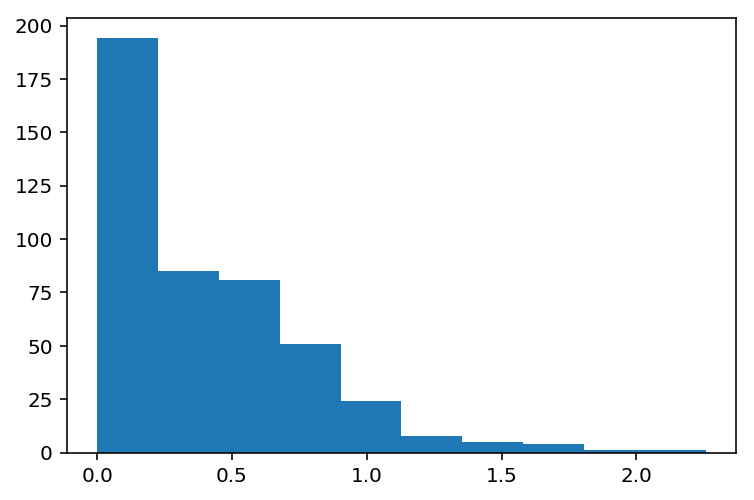

In [403]:
# Histograma de d2d - Números de objetos x distâcia em função de Ra e Dec 
plt.hist(d2d)

(array([  7.,  20.,  25.,  31.,  47.,  42.,  51.,  76.,  59.,  96.]),
 array([  0.240862  ,   2.21669934,   4.19253668,   6.16837402,
          8.14421136,  10.1200487 ,  12.09588604,  14.07172338,
         16.04756072,  18.02339806,  19.9992354 ]),
 <a list of 10 Patch objects>)

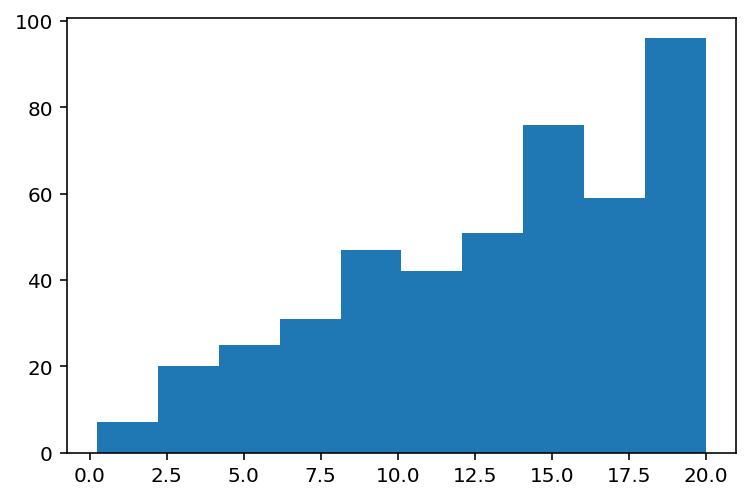

In [404]:
# Histograma 3d - Números de objetos x distâcia em função de Ra, Dec e z
plt.hist(d3d)

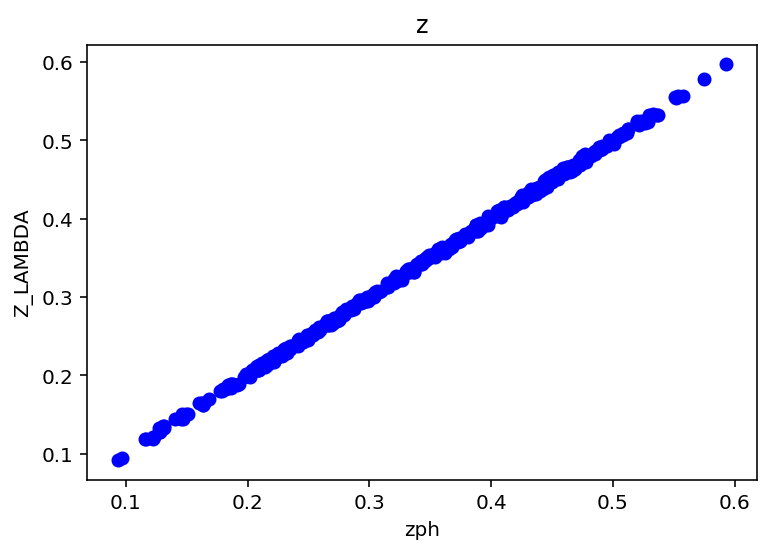

In [405]:
# Plot z vs z
iw = w[idxc_w]
ir = r[idxc_r]
zw = iw['zph']
zr = ir['Z_LAMBDA']
fig = plt.figure(1)
ax = fig.add_subplot(111)
plt. plot(zw,zr, 'bo')
plt.xlabel('zph')
plt.ylabel('Z_LAMBDA')
plt.title('z')

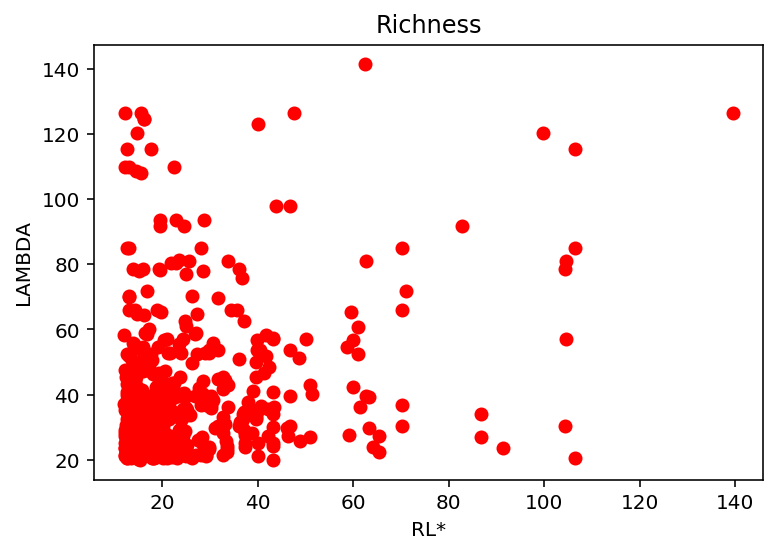

In [406]:
# Plor rich vs rich
rw = iw['RL*']
rr = ir['LAMBDA']
fig = plt.figure(1)
ax = fig.add_subplot(111)
plt. plot(rw,rr, 'ro')
plt.xlabel('RL*')
plt.ylabel('LAMBDA')
plt.title('Richness')

(0, 10)

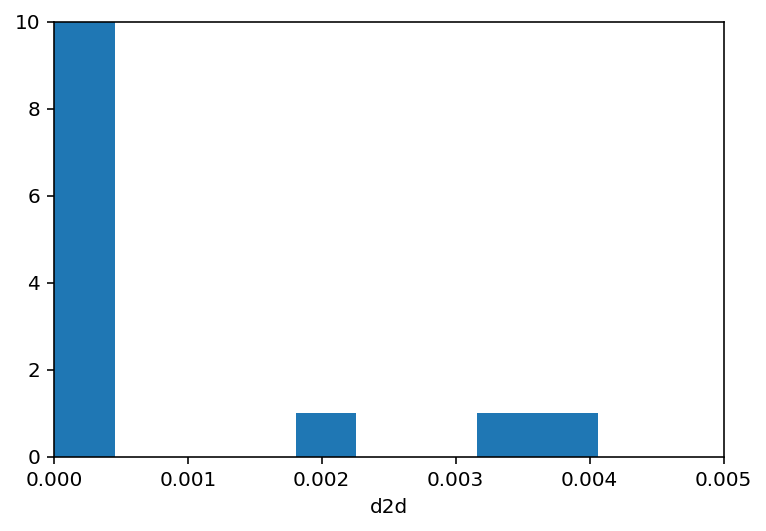

In [407]:
# Como a função search around pega os matches mais próximos em relação a cada objeto, muitos desses matches são
# repetidos e incorretos, fazendo um plot do d2d em função do raio, podemos chegar no número de matches aproximados.
plt.hist(d2d, bins=5000)
plt.xlabel('d2d')
plt.xlim(0,0.005)
plt.ylim(0,10)

In [408]:
# Aplica-se o raio encontrado, depois pega os resultados do match e retira apenas esses indices do catalogo 
# correspondente, em seguida chama-se os parametros relacionados a aqueles indices.
print len(np.unique(idxc_w))
print len(np.unique(idxc_r))
print len(idxc_w[d2d<0.001*u.deg])
print len(idxc_r[d2d<0.001*u.deg])

obje_wr = idxc_w[d2d<0.001*u.deg]
obje_rw = idxc_r[d2d<0.001*u.deg]

o_wr = w[obje_wr]
o_rw = r[obje_rw]

ra_wr = o_wr['RAJ2000']
dec_wr = o_wr['DEJ2000']
z_wr = o_wr['zph']

ra_rw = o_rw['RA']
dec_rw = o_rw['DEC']
z_rw = o_rw['Z_LAMBDA']

379
272
98
98


Será feito o mesmo para os seguintes matches.

# Match do Wen com o Koester

In [409]:
# Função distlim
lista_i = []
lista_r = []
for i in range(0,101000,10000):
    idxc_w, idxc_k, d2d, d3d = c_k.search_around_3d(c_w, i*u.kpc)
    lista_i.append(len(idxc_w))
    lista_r.append(i)

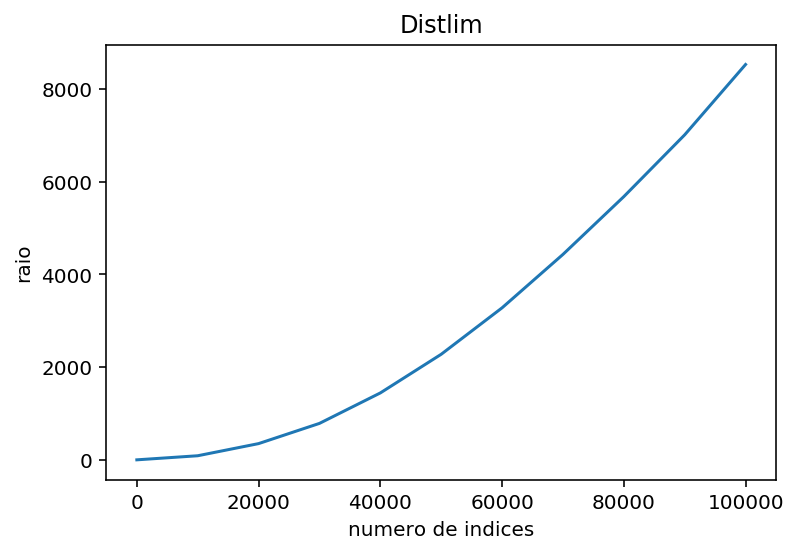

In [410]:
# Plot da função distlim
fig = plt.figure(1)
ax = fig.add_subplot(111)
plt. plot(lista_r,lista_i)
plt.xlabel('numero de indices')
plt.ylabel('raio')
plt.title('Distlim')

In [411]:
print 'Objects around to catalog 3d'
idxc_w, idxc_k, d2d, d3d = c_k.search_around_3d(c_w, 17000*u.kpc)
print 'Números de objetos do wen =',len(idxc_w)
print 'Números de objetos do koester =',len(idxc_k)

Objects around to catalog 3d
Números de objetos do wen = 247
Números de objetos do koester = 247


(array([ 59.,  22.,  42.,  25.,  38.,  29.,  15.,   6.,   7.,   4.]),
 array([ 0.        ,  0.1410505 ,  0.28210101,  0.42315151,  0.56420201,
         0.70525251,  0.84630302,  0.98735352,  1.12840402,  1.26945452,
         1.41050503]),
 <a list of 10 Patch objects>)

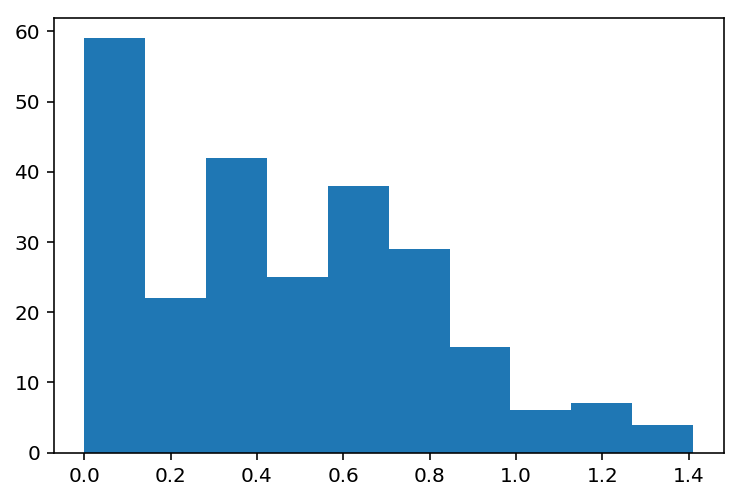

In [412]:
# Histograma de d2d - Números de objetos x distâcia em função de Ra e Dec 
plt.hist(d2d)

(array([  5.,   7.,  11.,  17.,  28.,  29.,  27.,  40.,  39.,  44.]),
 array([  0.82540992,   2.44231918,   4.05922845,   5.67613771,
          7.29304697,   8.90995623,  10.5268655 ,  12.14377476,
         13.76068402,  15.37759329,  16.99450255]),
 <a list of 10 Patch objects>)

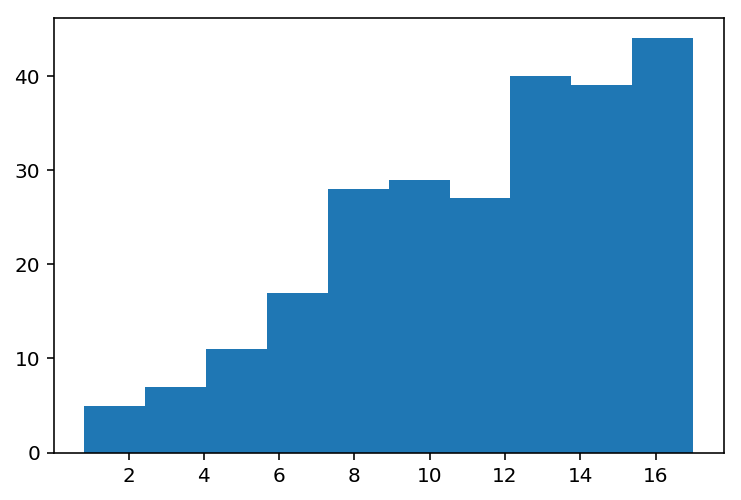

In [413]:
# Histograma 3d - Números de objetos x distâcia em função de Ra, Dec e z
plt.hist(d3d)

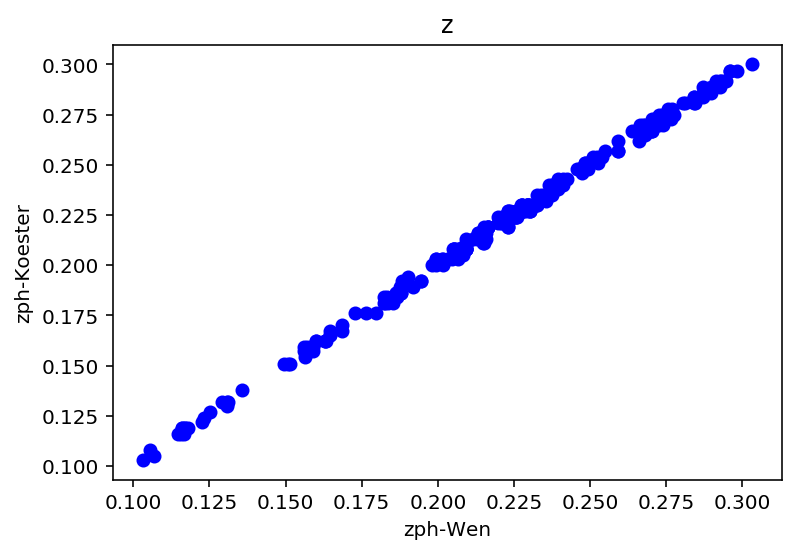

In [414]:
# Plot z vs z
iw = w[idxc_w]
ik = k[idxc_k]
zw = iw['zph']
zk = ik['zph']
fig = plt.figure(1)
ax = fig.add_subplot(111)
plt. plot(zw,zk, 'bo')
plt.xlabel('zph-Wen')
plt.ylabel('zph-Koester')
plt.title('z')

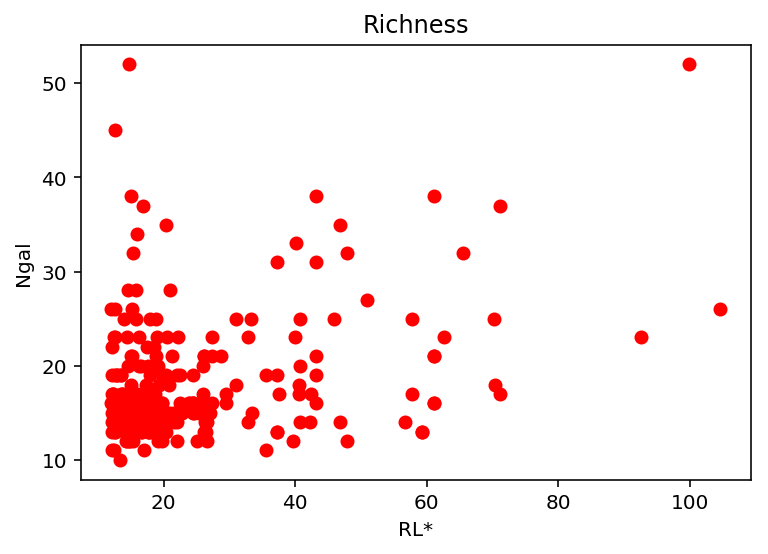

In [415]:
# Plor rich vs rich
rw = iw['RL*']
rk = ik['Ngal']
fig = plt.figure(1)
ax = fig.add_subplot(111)
plt. plot(rw,rk, 'ro')
plt.xlabel('RL*')
plt.ylabel('Ngal')
plt.title('Richness')

(0, 10)

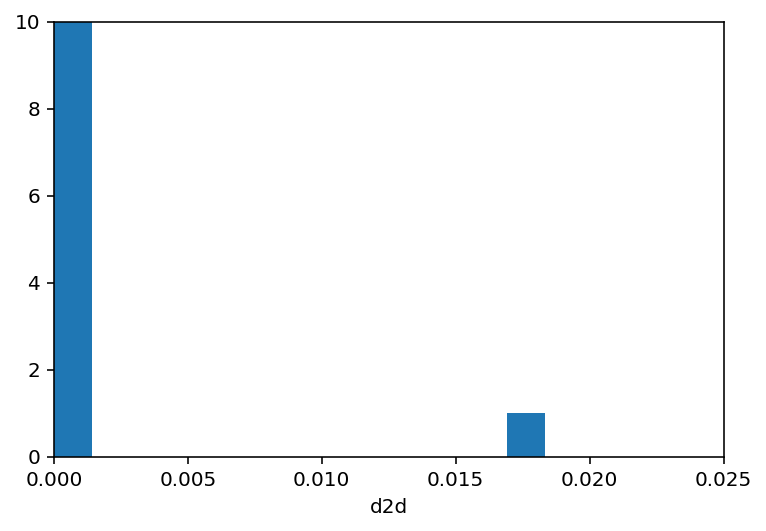

In [416]:
plt.hist(d2d, bins=1000)
plt.xlabel('d2d')
plt.xlim(0,0.025)
plt.ylim(0,10)

In [417]:
print len(np.unique(idxc_w))
print len(np.unique(idxc_k))
print len(idxc_w[d2d<0.005*u.deg])
print len(idxc_k[d2d<0.005*u.deg])

obje_wk = idxc_w[d2d<0.005*u.deg]
obje_kw = idxc_k[d2d<0.005*u.deg]

o_wk = w[obje_wk]
o_kw = k[obje_kw]

ra_wk = o_wk['RAJ2000']
dec_wk = o_wk['DEJ2000']
z_wk = o_wk['zph']

ra_kw = o_kw['RAJ2000']
dec_kw = o_kw['DEJ2000']
z_kw = o_kw['zph']

169
158
47
47


# Match do Wen com o Wazp

In [418]:
# Função distlim
lista_i = []
lista_r = []
for i in range(0,101000,10000):
    idxc_w, idxc_wz, d2d, d3d = c_wz.search_around_3d(c_w, i*u.kpc)
    lista_i.append(len(idxc_w))
    lista_r.append(i)

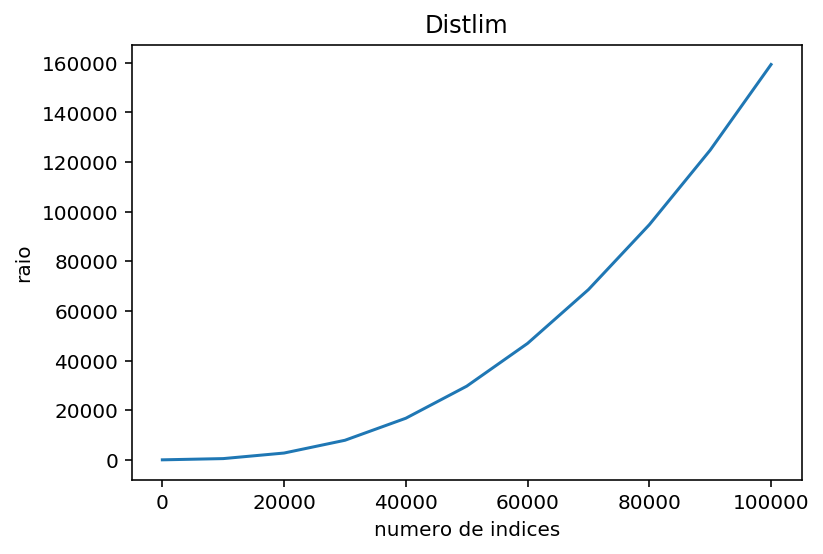

In [419]:
# Plot da função distlim
fig = plt.figure(1)
ax = fig.add_subplot(111)
plt. plot(lista_r,lista_i)
plt.xlabel('numero de indices')
plt.ylabel('raio')
plt.title('Distlim')

In [420]:
print 'Objects around to catalog 3d'
idxc_w, idxc_wz, d2d, d3d = c_wz.search_around_3d(c_w, 16000*u.kpc)
print 'Números de objetos do wen =',len(idxc_w)
print 'Números de objetos do wazp =',len(idxc_wz)

Objects around to catalog 3d
Números de objetos do wen = 1564
Números de objetos do wazp = 1564


(array([ 624.,  641.,  182.,   71.,   21.,    9.,   11.,    4.,    0.,    1.]),
 array([  1.92296606e-05,   2.67794316e-01,   5.35569401e-01,
          8.03344487e-01,   1.07111957e+00,   1.33889466e+00,
          1.60666975e+00,   1.87444483e+00,   2.14221992e+00,
          2.40999500e+00,   2.67777009e+00]),
 <a list of 10 Patch objects>)

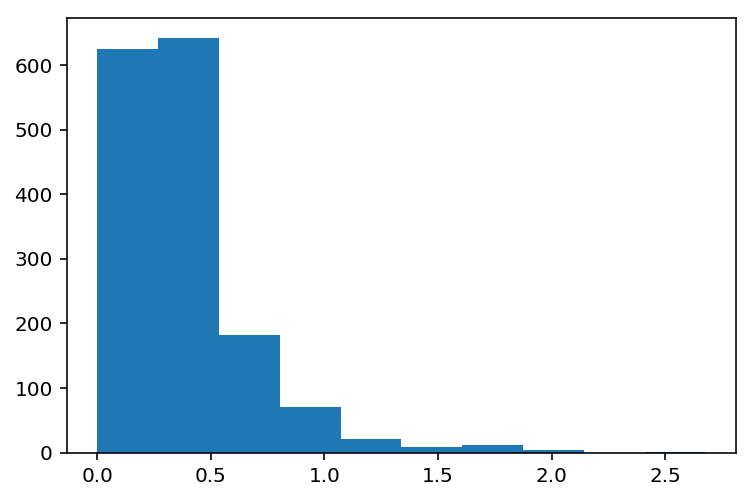

In [421]:
# Histograma de d2d - Números de objetos x distâcia em função de Ra e Dec 
plt.hist(d2d)

(array([  18.,   32.,   50.,   80.,  117.,  146.,  221.,  238.,  313.,  349.]),
 array([  0.11794685,   1.70556444,   3.29318204,   4.88079964,
          6.46841724,   8.05603484,   9.64365244,  11.23127004,
         12.81888763,  14.40650523,  15.99412283]),
 <a list of 10 Patch objects>)

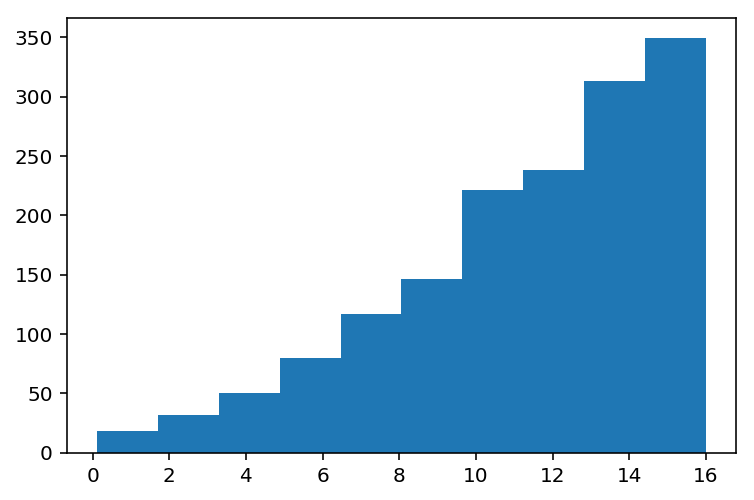

In [422]:
# Histograma 3d - Números de objetos x distâcia em função de Ra, Dec e z
plt.hist(d3d)

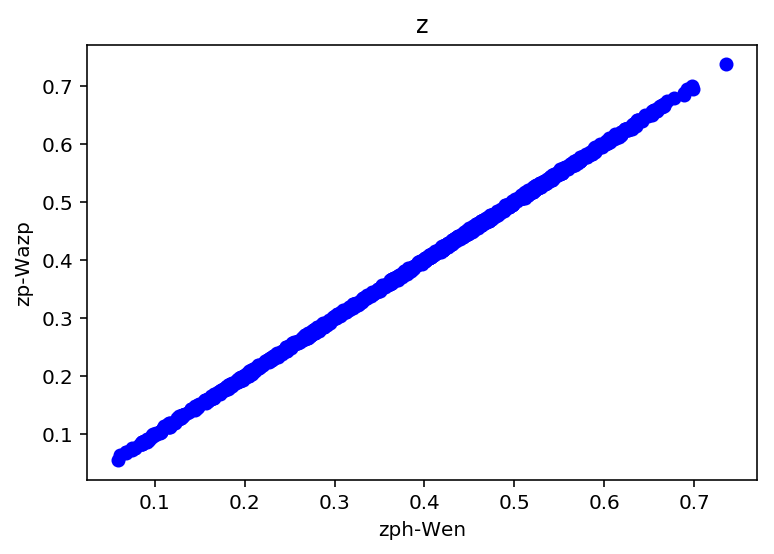

In [423]:
# Plot z vs z
iw = w[idxc_w]
iwz = wz[idxc_wz]
zw = iw['zph']
zwz = iwz['zp']
fig = plt.figure(1)
ax = fig.add_subplot(111)
plt. plot(zw,zwz, 'bo')
plt.xlabel('zph-Wen')
plt.ylabel('zp-Wazp')
plt.title('z')

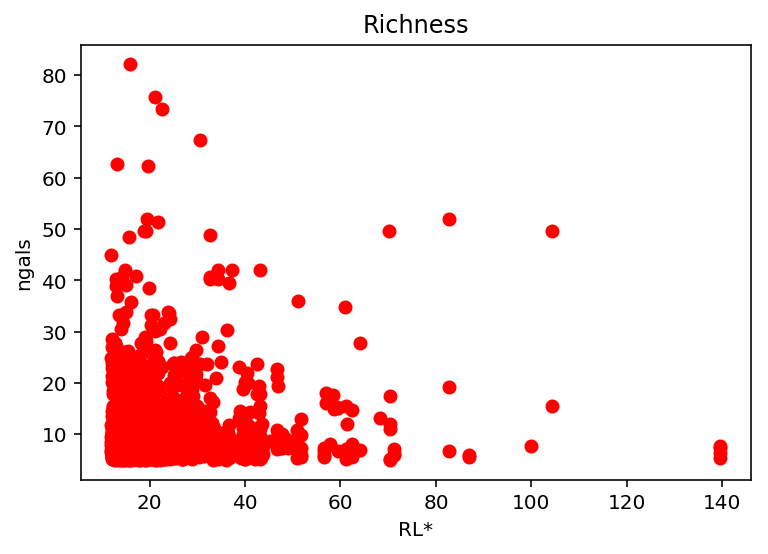

In [424]:
# Plor rich vs rich
rw = iw['RL*']
rwz = iwz['ngals']
fig = plt.figure(1)
ax = fig.add_subplot(111)
plt. plot(rw,rwz, 'ro')
plt.xlabel('RL*')
plt.ylabel('ngals')
plt.title('Richness')

(0, 10)

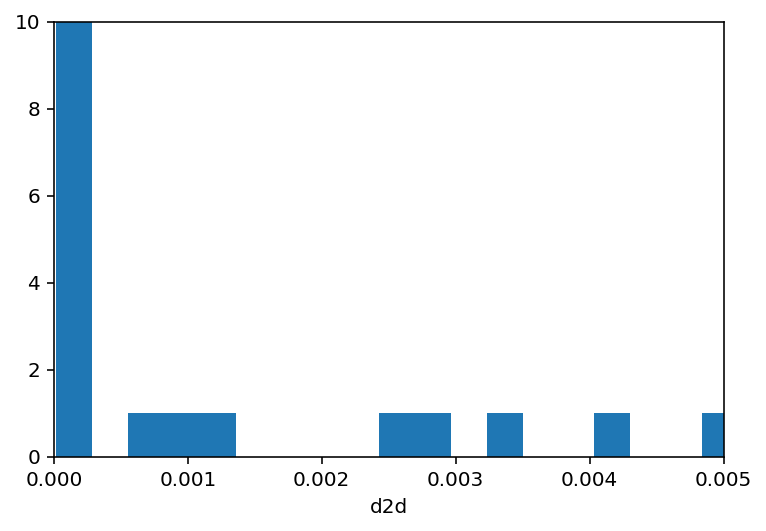

In [425]:
plt.hist(d2d, bins=10000)
plt.xlabel('d2d')
plt.xlim(0,0.005)
plt.ylim(0,10)

In [426]:
print len(np.unique(idxc_w))
print len(np.unique(idxc_wz))
print len(idxc_w[d2d<0.001*u.deg])
print len(idxc_wz[d2d<0.001*u.deg])

obje_wwz = idxc_w[d2d<0.001*u.deg]
obje_wzw = idxc_wz[d2d<0.001*u.deg]

o_wwz = w[obje_wwz]
o_wzw = wz[obje_wzw]

ra_wwz = o_wwz['RAJ2000']
dec_wwz = o_wwz['DEJ2000']
z_wwz = o_wwz['zph']

ra_wzw = o_wzw['ra']
dec_wzw = o_wzw['dec']
z_wzw = o_wzw['zp']

940
1339
38
38


# Match do Rykoff com o Koester

In [427]:
# Função distlim
lista_i = []
lista_r = []
for i in range(0,101000,10000):
    idxc_r, idxc_k, d2d, d3d = c_k.search_around_3d(c_r, i*u.kpc)
    lista_i.append(len(idxc_r))
    lista_r.append(i)

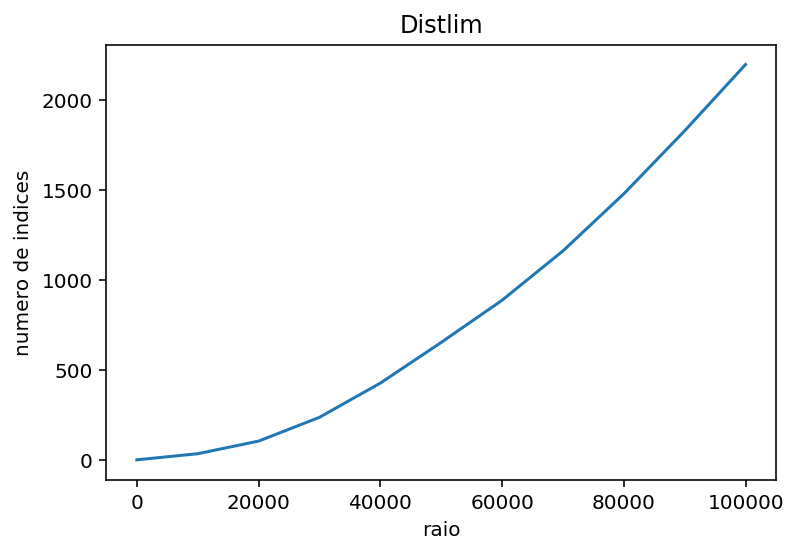

In [428]:
# Plot da função distlim
fig = plt.figure(1)
ax = fig.add_subplot(111)
plt. plot(lista_r,lista_i)
plt.ylabel('numero de indices')
plt.xlabel('raio')
plt.title('Distlim')

In [429]:
print 'Objects around to catalog 3d'
idxc_r, idxc_k, d2d, d3d = c_k.search_around_3d(c_r, 31000*u.kpc) 
print 'Números de objetos do rykoff =',len(idxc_r)
print 'Números de objetos do koester =',len(idxc_k)

Objects around to catalog 3d
Números de objetos do rykoff = 250
Números de objetos do koester = 250


(array([ 63.,  47.,  40.,  37.,  42.,  14.,   4.,   2.,   0.,   1.]),
 array([  2.16551792e-06,   2.95266683e-01,   5.90531201e-01,
          8.85795719e-01,   1.18106024e+00,   1.47632475e+00,
          1.77158927e+00,   2.06685379e+00,   2.36211831e+00,
          2.65738283e+00,   2.95264734e+00]),
 <a list of 10 Patch objects>)

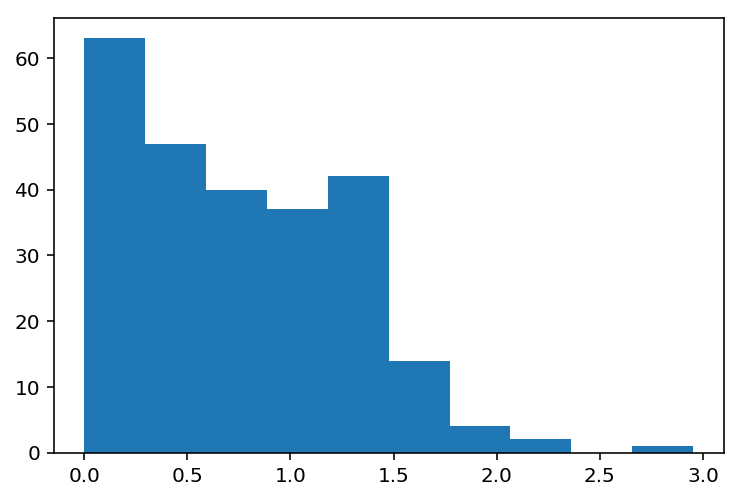

In [430]:
# Histograma de d2d - Números de objetos x distâcia em função de Ra e Dec 
plt.hist(d2d)

(array([ 10.,   9.,  13.,  13.,  25.,  20.,  33.,  42.,  44.,  41.]),
 array([  0.54320134,   3.58488876,   6.62657619,   9.66826362,
         12.70995104,  15.75163847,  18.7933259 ,  21.83501332,
         24.87670075,  27.91838818,  30.9600756 ]),
 <a list of 10 Patch objects>)

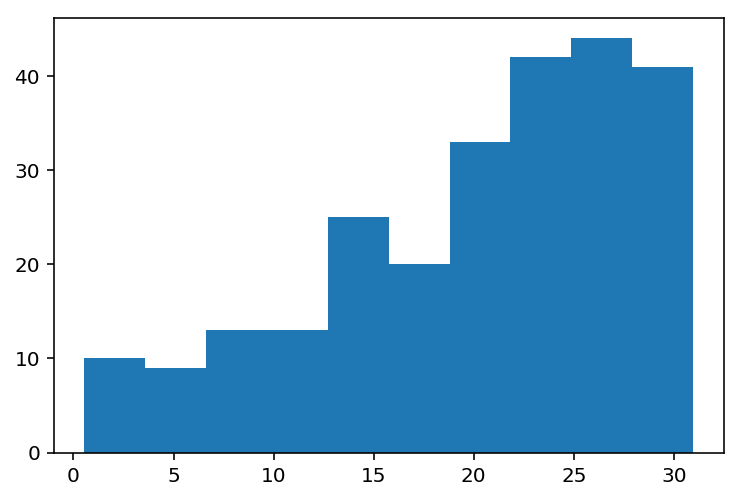

In [431]:
# Histograma de d3d - Números de objetos x distâcia em função de Ra, Dec e z
plt.hist(d3d)

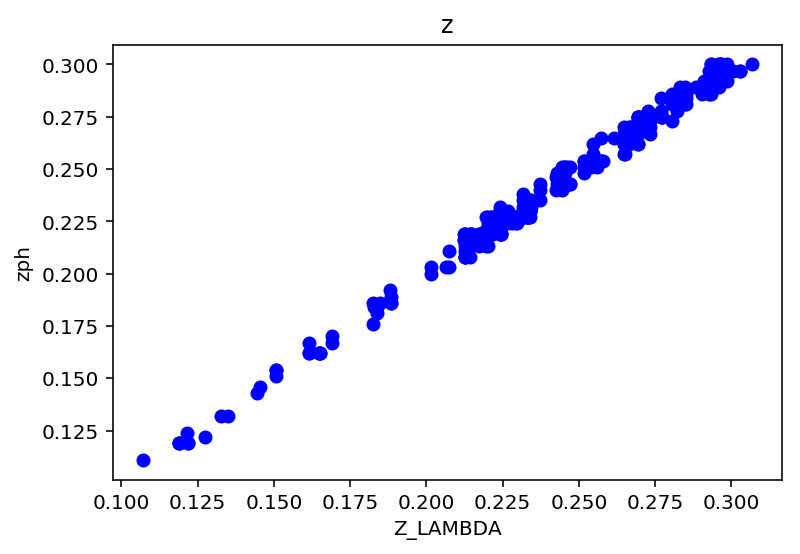

In [432]:
# Plot z vs z
ir = r[idxc_r]
ik = k[idxc_k]
zr = ir['Z_LAMBDA']
zk = ik['zph']
fig = plt.figure(1)
ax = fig.add_subplot(111)
plt. plot(zr,zk, 'bo')
plt.xlabel('Z_LAMBDA')
plt.ylabel('zph')
plt.title('z')

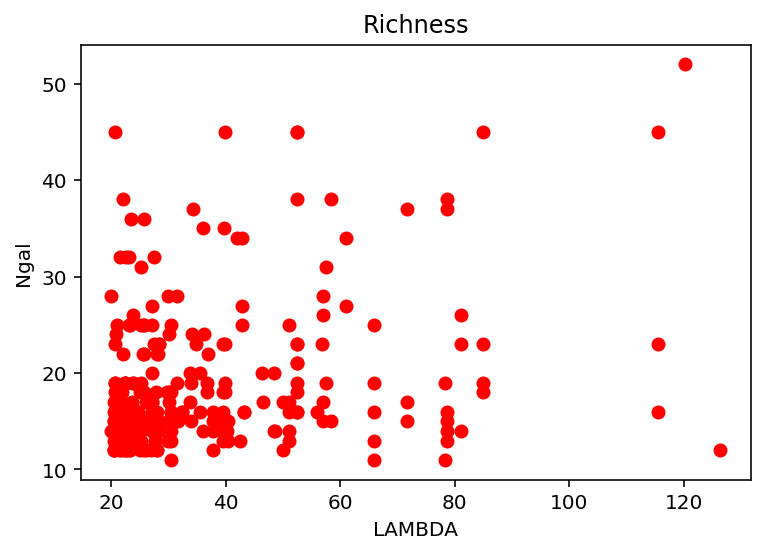

In [433]:
# Plor rich vs rich
rr = ir['LAMBDA']
rk = ik['Ngal']
fig = plt.figure(1)
ax = fig.add_subplot(111)
plt. plot(rr,rk, 'ro')
plt.xlabel('LAMBDA')
plt.ylabel('Ngal')
plt.title('Richness')

(0, 10)

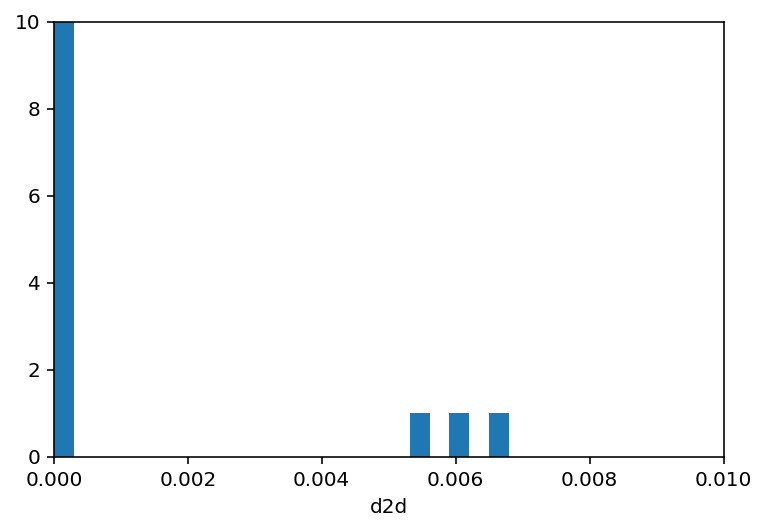

In [434]:
plt.hist(d2d, bins=10000)
plt.xlabel('d2d')
plt.xlim(0,0.01)
plt.ylim(0,10)

In [435]:
print len(np.unique(idxc_k))
print len(np.unique(idxc_r))
print len(idxc_k[d2d<0.002*u.deg])
print len(idxc_r[d2d<0.002*u.deg])

obje_kr = idxc_k[d2d<0.002*u.deg]
obje_rk = idxc_r[d2d<0.002*u.deg]

o_kr = k[obje_kr]
o_rk = r[obje_rk]

ra_kr = o_kr['RAJ2000']
dec_kr = o_kr['DEJ2000']
z_kr = o_kr['zph']

ra_rk = o_rk['RA']
dec_rk = o_rk['DEC']
z_rk = o_rk['Z_LAMBDA']

141
106
28
28


# Match do Rykoff com o Wazp

In [436]:
# Função distlim
lista_i = []
lista_r = []
for i in range(0,101000,10000):
    idxc_r, idxc_wz, d2d, d3d = c_wz.search_around_3d(c_r, i*u.kpc)
    lista_i.append(len(idxc_r))
    lista_r.append(i)

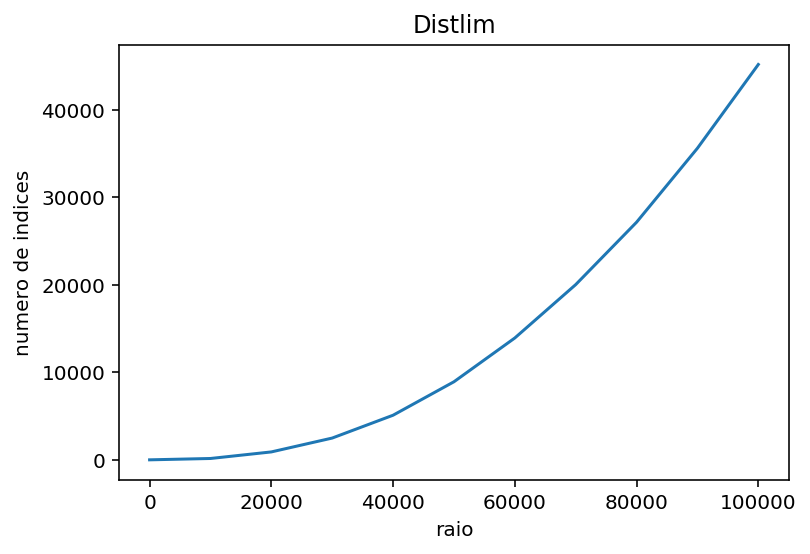

In [437]:
# Plot da função distlim
fig = plt.figure(1)
ax = fig.add_subplot(111)
plt. plot(lista_r,lista_i)
plt.ylabel('numero de indices')
plt.xlabel('raio')
plt.title('Distlim')

In [438]:
print 'Objects around to catalog 3d'
idxc_r, idxc_wz, d2d, d3d = c_wz.search_around_3d(c_r, 15000*u.kpc) 
print 'Números de objetos do rykoff =',len(idxc_r)
print 'Números de objetos do wazp =',len(idxc_wz)

Objects around to catalog 3d
Números de objetos do rykoff = 452
Números de objetos do wazp = 452


(array([ 138.,  169.,   94.,   29.,    8.,    5.,    5.,    2.,    0.,    2.]),
 array([  2.12508356e-05,   1.96626713e-01,   3.93232175e-01,
          5.89837637e-01,   7.86443099e-01,   9.83048561e-01,
          1.17965402e+00,   1.37625948e+00,   1.57286495e+00,
          1.76947041e+00,   1.96607587e+00]),
 <a list of 10 Patch objects>)

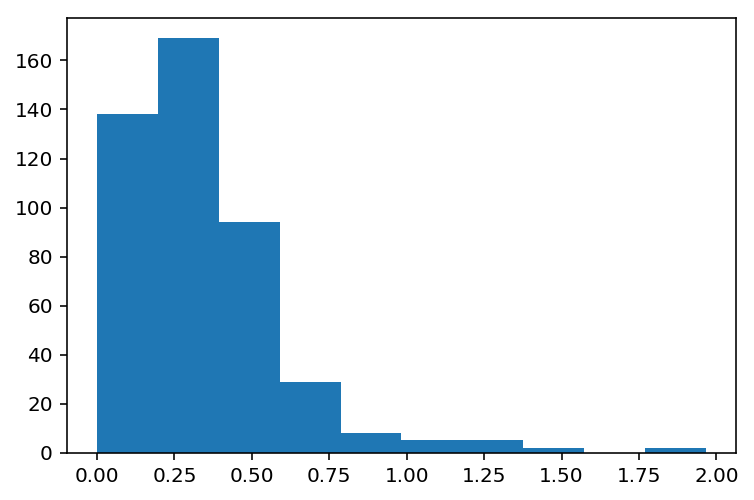

In [439]:
# Histograma de d2d - Números de objetos x distâcia em função de Ra e Dec 
plt.hist(d2d)

(array([   7.,   18.,   15.,   23.,   31.,   35.,   45.,   74.,   85.,  119.]),
 array([  0.3378279 ,   1.80078368,   3.26373946,   4.72669523,
          6.18965101,   7.65260679,   9.11556257,  10.57851834,
         12.04147412,  13.5044299 ,  14.96738567]),
 <a list of 10 Patch objects>)

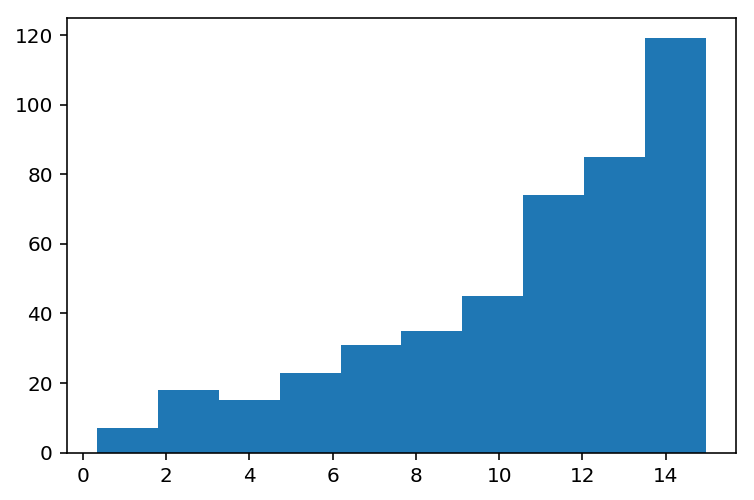

In [440]:
# Histograma de d3d - Números de objetos x distâcia em função de Ra, Dec e z
plt.hist(d3d)

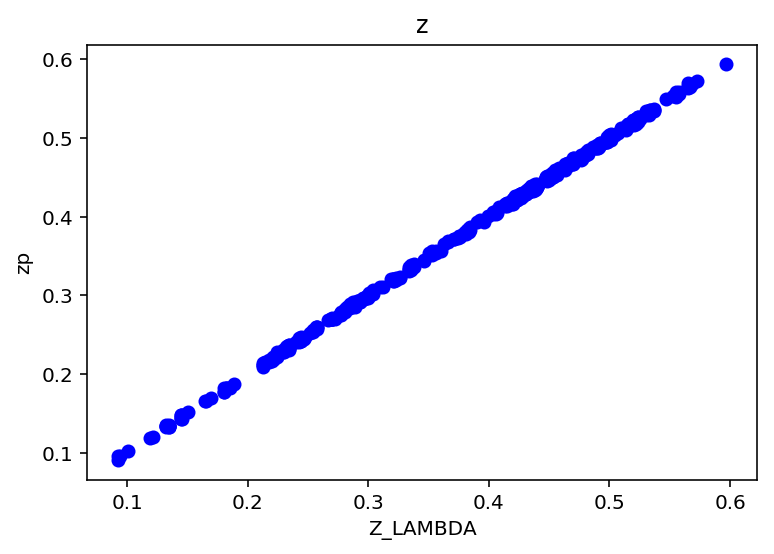

In [441]:
# Plot z vs z
ir = r[idxc_r]
iwz = wz[idxc_wz]
zr = ir['Z_LAMBDA']
zwz = iwz['zp']
fig = plt.figure(1)
ax = fig.add_subplot(111)
plt. plot(zr,zwz, 'bo')
plt.xlabel('Z_LAMBDA')
plt.ylabel('zp')
plt.title('z')

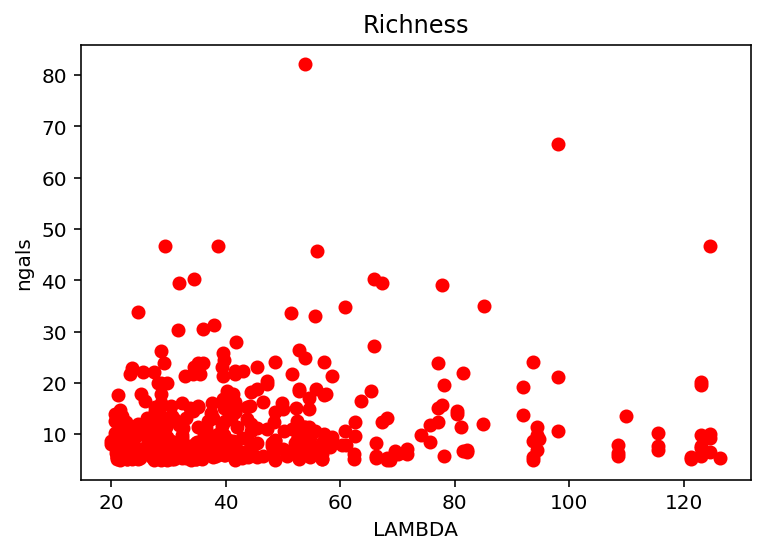

In [442]:
# Plor rich vs rich
rr = ir['LAMBDA']
rwz = iwz['ngals']
fig = plt.figure(1)
ax = fig.add_subplot(111)
plt. plot(rr,rwz, 'ro')
plt.xlabel('LAMBDA')
plt.ylabel('ngals')
plt.title('Richness')

(0, 10)

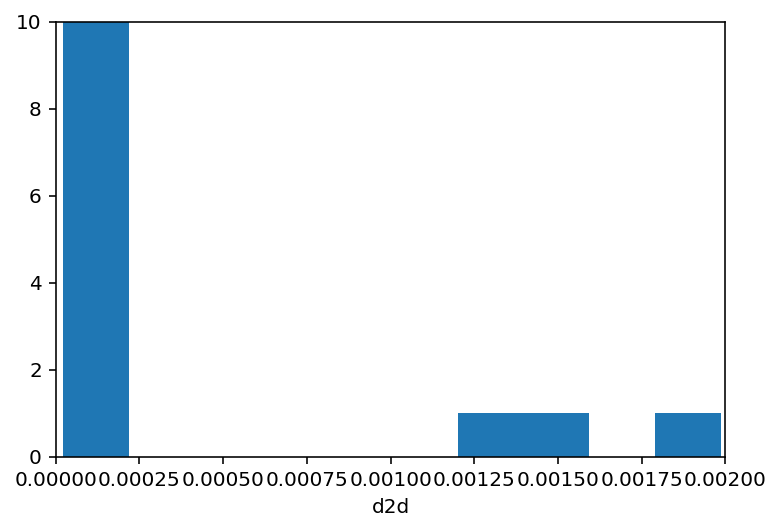

In [443]:
plt.hist(d2d, bins=10000)
plt.xlabel('d2d')
plt.xlim(0,0.002)
plt.ylim(0,10)

In [444]:
print len(np.unique(idxc_r))
print len(np.unique(idxc_wz))
print len(idxc_r[d2d<0.001*u.deg])
print len(idxc_wz[d2d<0.001*u.deg])

obje_rwz = idxc_r[d2d<0.001*u.deg]
obje_wzr = idxc_wz[d2d<0.001*u.deg]

o_rwz = r[obje_rwz]
o_wzr = wz[obje_wzr]

ra_rwz = o_rwz['RA']
dec_rwz = o_rwz['DEC']
z_rwz = o_rwz['Z_LAMBDA']

ra_wzr = o_wzr['ra']
dec_wzr = o_wzr['dec']
z_wzr = o_wzr['zp']

248
407
20
20


# Match do Koester com o Wazp

In [445]:
# Função distlim
lista_i = []
lista_r = []
for i in range(0,101000,10000):
    idxc_k, idxc_wz, d2d, d3d = c_wz.search_around_3d(c_k, i*u.kpc)
    lista_i.append(len(idxc_k))
    lista_r.append(i)

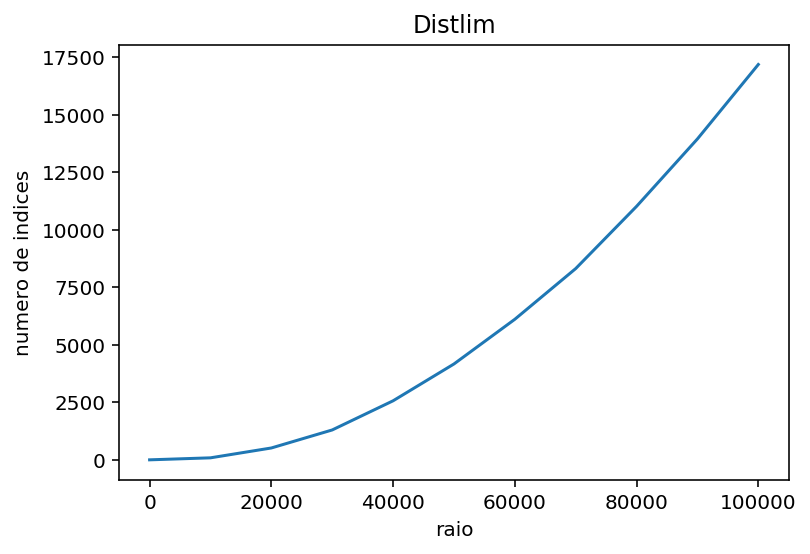

In [446]:
# Plot da função distlim
fig = plt.figure(1)
ax = fig.add_subplot(111)
plt. plot(lista_r,lista_i)
plt.ylabel('numero de indices')
plt.xlabel('raio')
plt.title('Distlim')

In [447]:
print 'Objects around to catalog 3d'
idxc_k, idxc_wz, d2d, d3d = c_wz.search_around_3d(c_k, 15000*u.kpc) 
print 'Números de objetos do rykoff =',len(idxc_k)
print 'Números de objetos do wazp =',len(idxc_wz)

Objects around to catalog 3d
Números de objetos do rykoff = 240
Números de objetos do wazp = 240


(array([ 39.,  42.,  51.,  46.,  33.,  14.,   9.,   2.,   2.,   2.]),
 array([  7.07010663e-06,   1.80516742e-01,   3.61026414e-01,
          5.41536086e-01,   7.22045757e-01,   9.02555429e-01,
          1.08306510e+00,   1.26357477e+00,   1.44408444e+00,
          1.62459412e+00,   1.80510379e+00]),
 <a list of 10 Patch objects>)

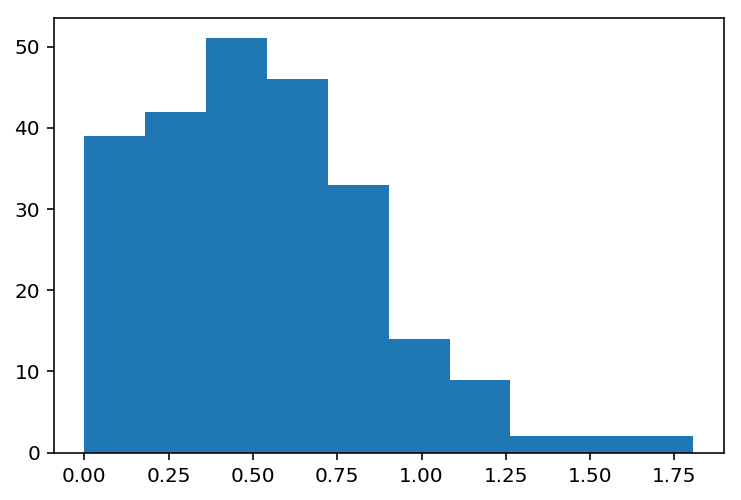

In [448]:
# Histograma de d2d - Números de objetos x distâcia em função de Ra e Dec 
plt.hist(d2d)

(array([  1.,   6.,  13.,  14.,  17.,  26.,  22.,  36.,  42.,  63.]),
 array([  0.4839107 ,   1.93475407,   3.38559745,   4.83644082,
          6.28728419,   7.73812757,   9.18897094,  10.63981431,
         12.09065769,  13.54150106,  14.99234443]),
 <a list of 10 Patch objects>)

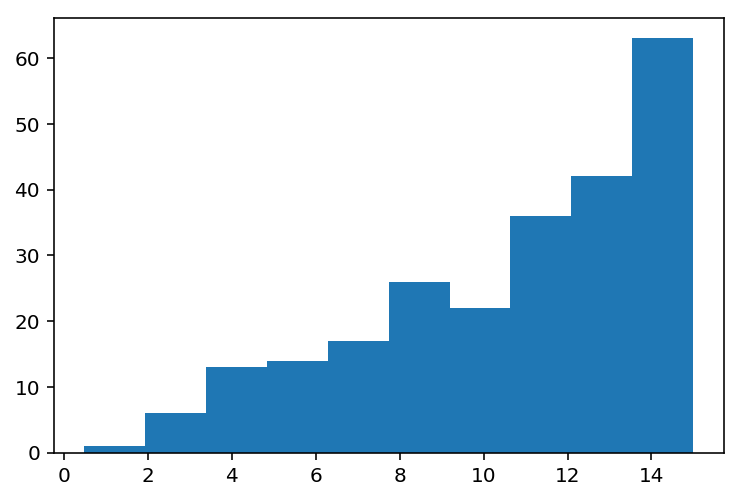

In [449]:
# Histograma de d3d - Números de objetos x distâcia em função de Ra, Dec e z
plt.hist(d3d)

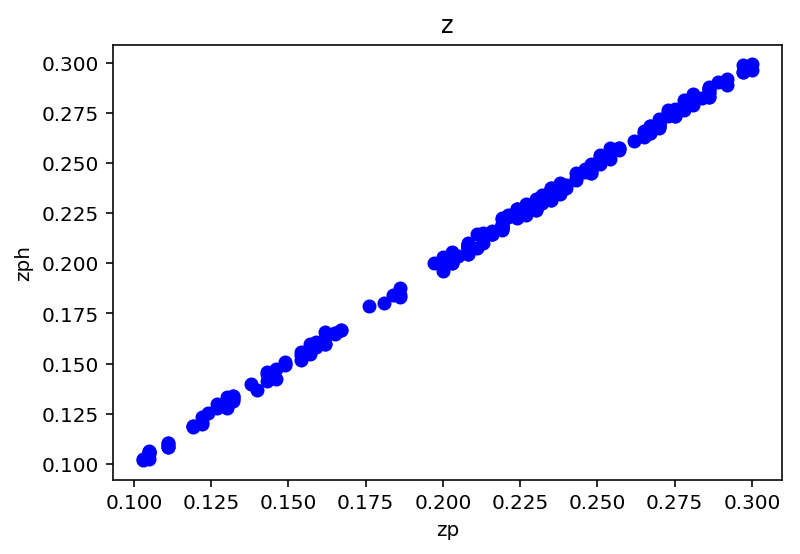

In [450]:
# Plot z vs z
iwz = wz[idxc_wz]
ik = k[idxc_k]
zwz = iwz['zp']
zk = ik['zph']
fig = plt.figure(1)
ax = fig.add_subplot(111)
plt. plot(zk,zwz, 'bo')
plt.xlabel('zp')
plt.ylabel('zph')
plt.title('z')

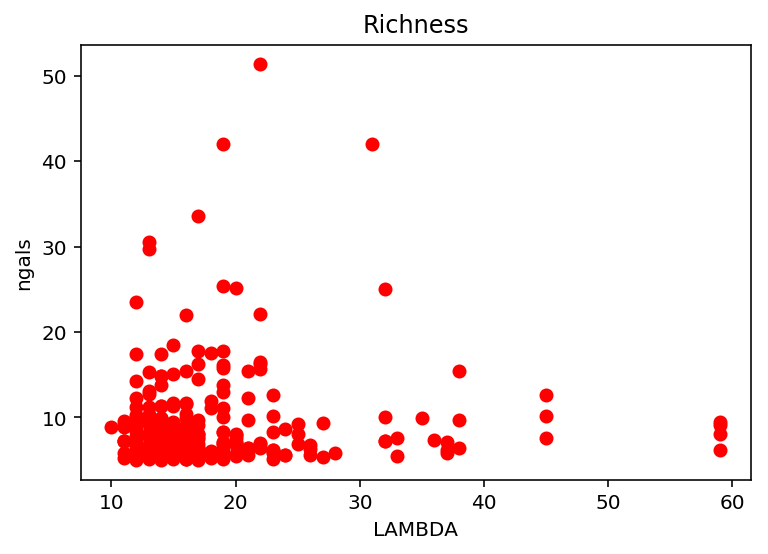

In [451]:
# Plor rich vs rich
rwz = iwz['ngals']
rk = ik['Ngal']
fig = plt.figure(1)
ax = fig.add_subplot(111)
plt. plot(rk,rwz, 'ro')
plt.xlabel('LAMBDA')
plt.ylabel('ngals')
plt.title('Richness')

(0, 10)

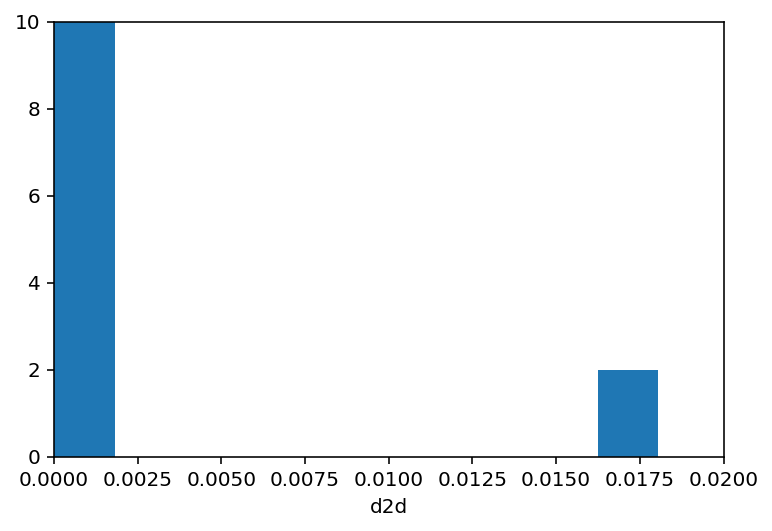

In [452]:
plt.hist(d2d, bins=1000)
plt.xlabel('d2d')
plt.xlim(0,0.02)
plt.ylim(0,10)

In [453]:
print len(np.unique(idxc_k))
print len(np.unique(idxc_wz))
print len(idxc_k[d2d<0.002*u.deg])
print len(idxc_wz[d2d<0.002*u.deg])

obje_kwz = idxc_k[d2d<0.002*u.deg]
obje_wzk = idxc_wz[d2d<0.002*u.deg]

o_kwz = k[obje_kwz]
o_wzk = wz[obje_wzk]

ra_kwz = o_kwz['RAJ2000']
dec_kwz = o_kwz['DEJ2000']
z_kwz = o_kwz['zph']

ra_wzk = o_wzk['ra']
dec_wzk = o_wzk['dec']
z_wzk = o_wzk['zp']

149
201
10
10


# Diagrama de Venn

In [454]:
# Formatando o Wen
Ra_w = w['RAJ2000']
Dec_w = w['DEJ2000']
z_w = w['zph']

lista_w = []
for i in range(0,len(w)):
    lista_w.append('%.1f_%.1f_%.1f'%(Ra_w[i], Dec_w[i], z_w[i]))
print len(lista_w)

1805


In [455]:
# Formatando o Rykoff
Ra_r = r['RA']
Dec_r = r['DEC']
z_r = r['Z_LAMBDA']

lista_r = []
for i in range(0,len(r)):
    lista_r.append('%.1f_%.1f_%.1f'%(Ra_r[i], Dec_r[i], z_r[i]))
print len(lista_r)

497


In [456]:
# Formatando o Koester
Ra_k = k['RAJ2000']
Dec_k = k['DEJ2000']
z_k = k['zph']

lista_k = []
for i in range(0,len(k)):
    lista_k.append('%.1f_%.1f_%.1f'%(Ra_k[i], Dec_k[i], z_k[i]))
print len(lista_k)

260


In [457]:
# Formatando o Wazp
Ra_wz= wz['ra']
Dec_wz= wz['dec']
z_wz= wz['zp']

lista_wz =[]
for i in range(0,len(wz)):
    lista_wz.append('%.1f_%.1f_%.1f'%(Ra_wz[i],Dec_wz[i], z_wz[i]))
print len(lista_wz)

15880


# Comparando os catalogos com limite de z

Histograma com os valores do Redshift


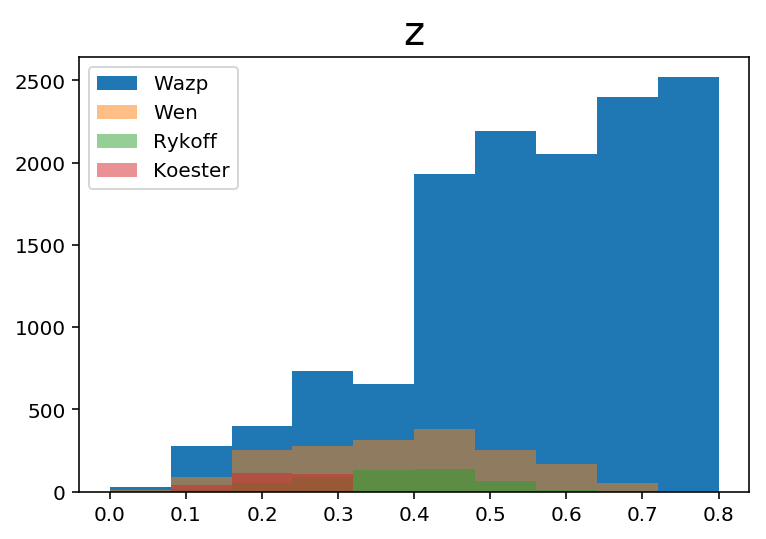

In [458]:
print 'Histograma com os valores do Redshift'

Hist_wz = plt.hist(z_wz, label = 'Wazp', range = [0, 0.8])
Hist_w = plt.hist(z_w, alpha = 0.5, label = 'Wen', range = [0, 0.8])
Hist_r = plt.hist(z_r, alpha = 0.5, label = 'Rykoff', range = [0, 0.8])
Hist_k = plt.hist(z_k, alpha = 0.5, label = 'Koester', range = [0, 0.8])
plt.title('z', fontsize='20')
plt.legend()

In [459]:
# Como o footprint do Wazp vai mais fundo que os outros catalogos, será feito um corte no z em 0.7:
zp = []
z = wz['zp']
for i in range(0,len(wz)):
    if z[i] < 0.7:
        zp.append(i)
print len(zp)

10073


In [460]:
# Aplicando os indices ao catalogo
wz = wz[zp]

In [461]:
print("\033[43;30mValores de Ra, Dec e z de cada catalogo\033[m")
c_w = SkyCoord(ra = w['RAJ2000']*u.degree, dec = w['DEJ2000']*u.deg, distance = cosmo.comoving_distance(w['zph'])) 
c_r = SkyCoord(ra = r['RA']*u.deg, dec = r['DEC']*u.deg, distance = cosmo.comoving_distance(r['Z_LAMBDA']))
c_k = SkyCoord(ra = k['RAJ2000'], dec = k['DEJ2000'], distance = cosmo.comoving_distance(k['zph']))
c_wz = SkyCoord(ra = wz['ra']*u.deg, dec = wz['dec']*u.deg, distance = cosmo.comoving_distance(wz['zp']))

Valores de Ra, Dec e z de cada catalogo


# Match do Wen com o Wazp

In [462]:
print 'Objects around to catalog 3d'
idxc_w, idxc_wz, d2d, d3d = c_wz.search_around_3d(c_w, 16000*u.kpc)
print 'Números de objetos do wen =',len(idxc_w)
print 'Números de objetos do wazp =',len(idxc_wz)

Objects around to catalog 3d
Números de objetos do wen = 1562
Números de objetos do wazp = 1562


(array([ 623.,  640.,  182.,   71.,   21.,    9.,   11.,    4.,    0.,    1.]),
 array([  1.92296606e-05,   2.67794316e-01,   5.35569401e-01,
          8.03344487e-01,   1.07111957e+00,   1.33889466e+00,
          1.60666975e+00,   1.87444483e+00,   2.14221992e+00,
          2.40999500e+00,   2.67777009e+00]),
 <a list of 10 Patch objects>)

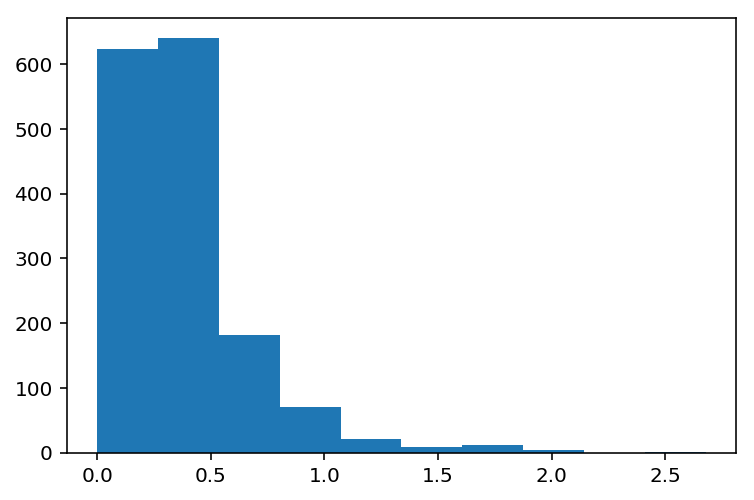

In [463]:
# Histograma de d2d - Números de objetos x distâcia em função de Ra e Dec 
plt.hist(d2d)

(array([  18.,   32.,   50.,   80.,  117.,  146.,  221.,  238.,  312.,  348.]),
 array([  0.11794685,   1.70556444,   3.29318204,   4.88079964,
          6.46841724,   8.05603484,   9.64365244,  11.23127004,
         12.81888763,  14.40650523,  15.99412283]),
 <a list of 10 Patch objects>)

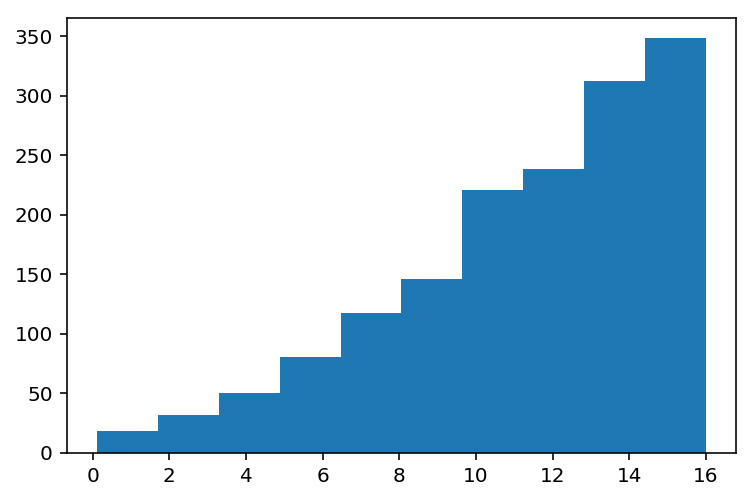

In [464]:
# Histograma 3d - Números de objetos x distâcia em função de Ra, Dec e z
plt.hist(d3d)

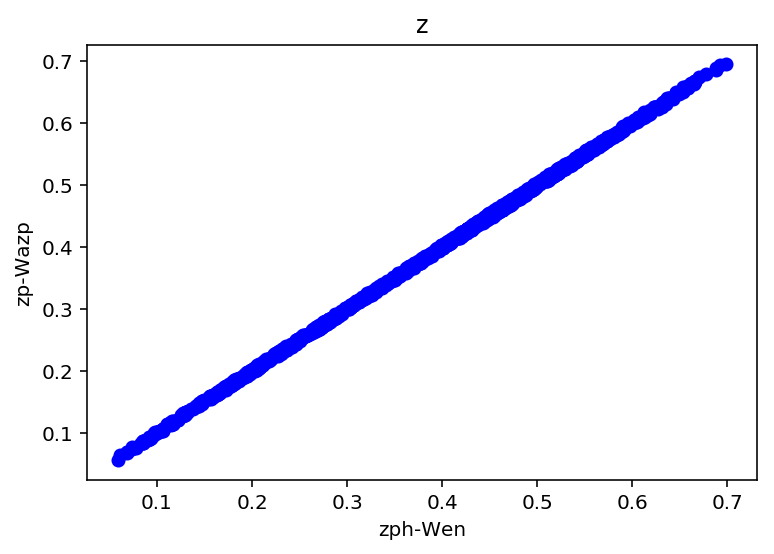

In [465]:
# Plot z vs z
iw = w[idxc_w]
iwz = wz[idxc_wz]
zw = iw['zph']
zwz = iwz['zp']
fig = plt.figure(1)
ax = fig.add_subplot(111)
plt. plot(zw,zwz, 'bo')
plt.xlabel('zph-Wen')
plt.ylabel('zp-Wazp')
plt.title('z')

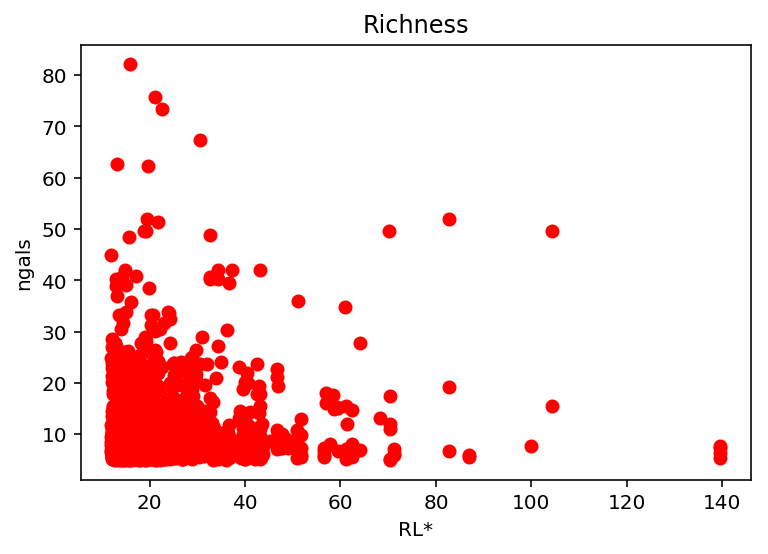

In [466]:
# Plor rich vs rich
rw = iw['RL*']
rwz = iwz['ngals']
fig = plt.figure(1)
ax = fig.add_subplot(111)
plt. plot(rw,rwz, 'ro')
plt.xlabel('RL*')
plt.ylabel('ngals')
plt.title('Richness')

(0, 10)

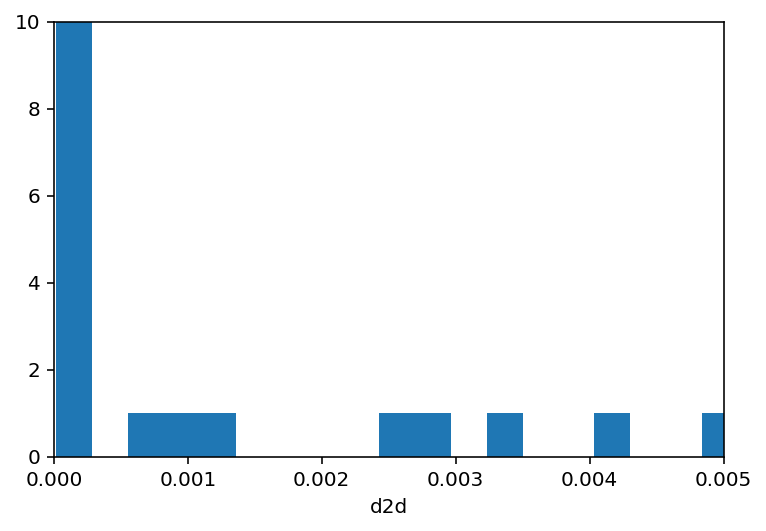

In [467]:
plt.hist(d2d, bins=10000)
plt.xlabel('d2d')
plt.xlim(0,0.005)
plt.ylim(0,10)

In [468]:
print len(np.unique(idxc_w))
print len(np.unique(idxc_wz))
print len(idxc_w[d2d<0.001*u.deg])
print len(idxc_wz[d2d<0.001*u.deg])

obje_wwz = idxc_w[d2d<0.001*u.deg]
obje_wzw = idxc_wz[d2d<0.001*u.deg]

o_wwz = w[obje_wwz]
o_wzw = wz[obje_wzw]

ra_wwz = o_wwz['RAJ2000']
dec_wwz = o_wwz['DEJ2000']
z_wwz = o_wwz['zph']

ra_wzw = o_wzw['ra']
dec_wzw = o_wzw['dec']
z_wzw = o_wzw['zp']

938
1337
38
38


# Match do Rykoff com o Wazp

In [469]:
print 'Objects around to catalog 3d'
idxc_r, idxc_wz, d2d, d3d = c_wz.search_around_3d(c_r, 15000*u.kpc) 
print 'Números de objetos do rykoff =',len(idxc_r)
print 'Números de objetos do wazp =',len(idxc_wz)

Objects around to catalog 3d
Números de objetos do rykoff = 452
Números de objetos do wazp = 452


(array([ 138.,  169.,   94.,   29.,    8.,    5.,    5.,    2.,    0.,    2.]),
 array([  2.12508356e-05,   1.96626713e-01,   3.93232175e-01,
          5.89837637e-01,   7.86443099e-01,   9.83048561e-01,
          1.17965402e+00,   1.37625948e+00,   1.57286495e+00,
          1.76947041e+00,   1.96607587e+00]),
 <a list of 10 Patch objects>)

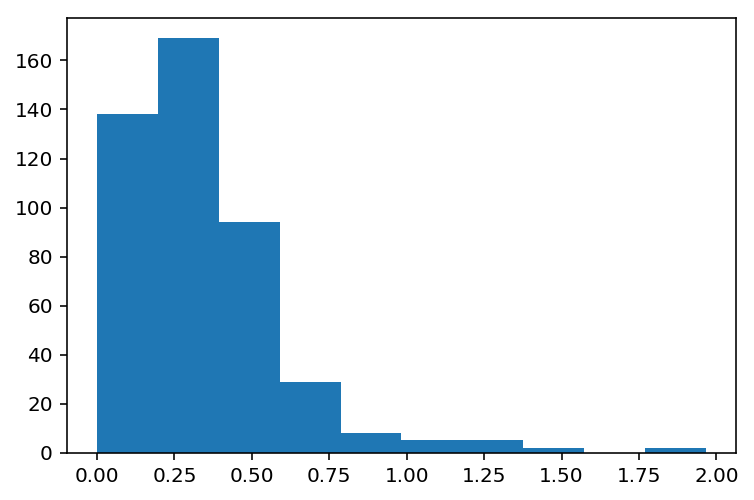

In [470]:
# Histograma de d2d - Números de objetos x distâcia em função de Ra e Dec 
plt.hist(d2d)

(array([   7.,   18.,   15.,   23.,   31.,   35.,   45.,   74.,   85.,  119.]),
 array([  0.3378279 ,   1.80078368,   3.26373946,   4.72669523,
          6.18965101,   7.65260679,   9.11556257,  10.57851834,
         12.04147412,  13.5044299 ,  14.96738567]),
 <a list of 10 Patch objects>)

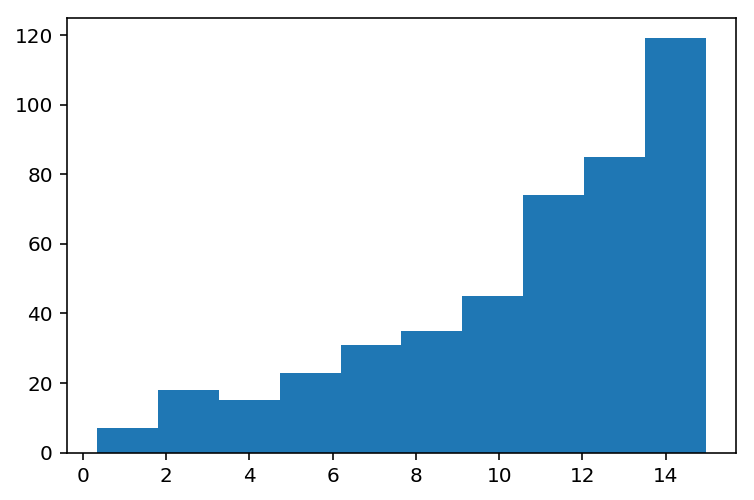

In [471]:
# Histograma 3d - Números de objetos x distâcia em função de Ra, Dec e z
plt.hist(d3d)

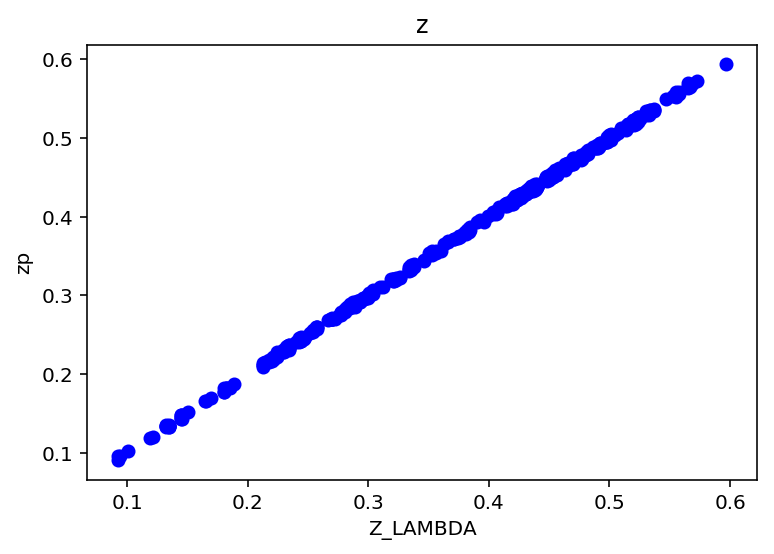

In [472]:
# Plot z vs z
ir = r[idxc_r]
iwz = wz[idxc_wz]
zr = ir['Z_LAMBDA']
zwz = iwz['zp']
fig = plt.figure(1)
ax = fig.add_subplot(111)
plt. plot(zr,zwz, 'bo')
plt.xlabel('Z_LAMBDA')
plt.ylabel('zp')
plt.title('z')

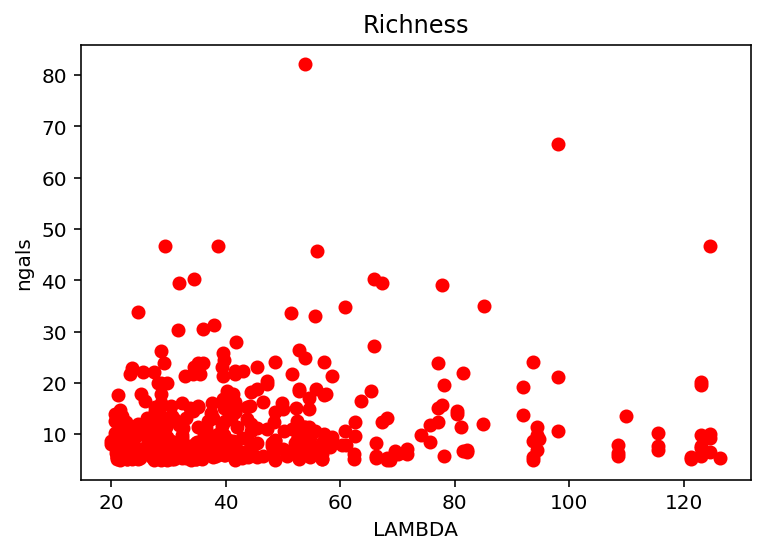

In [473]:
# Plor rich vs rich
rr = ir['LAMBDA']
rwz = iwz['ngals']
fig = plt.figure(1)
ax = fig.add_subplot(111)
plt. plot(rr,rwz, 'ro')
plt.xlabel('LAMBDA')
plt.ylabel('ngals')
plt.title('Richness')

(0, 10)

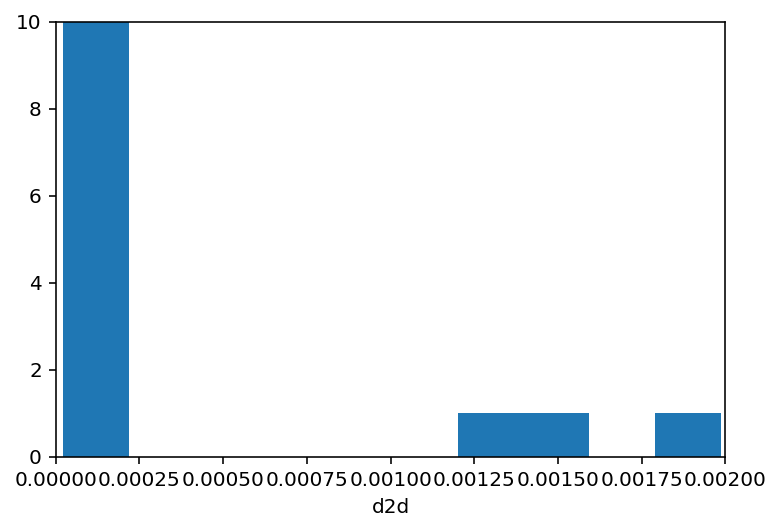

In [474]:
plt.hist(d2d, bins=10000)
plt.xlabel('d2d')
plt.xlim(0,0.002)
plt.ylim(0,10)

In [475]:
print len(np.unique(idxc_r))
print len(np.unique(idxc_wz))
print len(idxc_r[d2d<0.001*u.deg])
print len(idxc_wz[d2d<0.001*u.deg])

obje_rwz = idxc_r[d2d<0.001*u.deg]
obje_wzr = idxc_wz[d2d<0.001*u.deg]

o_rwz = r[obje_rwz]
o_wzr = wz[obje_wzr]

ra_rwz = o_rwz['RA']
dec_rwz = o_rwz['DEC']
z_rwz = o_rwz['Z_LAMBDA']

ra_wzr = o_wzr['ra']
dec_wzr = o_wzr['dec']
z_wzr = o_wzr['zp']

248
407
20
20


# Match do Koester com o Wazp

In [476]:
print 'Objects around to catalog 3d'
idxc_k, idxc_wz, d2d, d3d = c_wz.search_around_3d(c_k, 15000*u.kpc) 
print 'Números de objetos do rykoff =',len(idxc_k)
print 'Números de objetos do wazp =',len(idxc_wz)

Objects around to catalog 3d
Números de objetos do rykoff = 240
Números de objetos do wazp = 240


(array([ 39.,  42.,  51.,  46.,  33.,  14.,   9.,   2.,   2.,   2.]),
 array([  7.07010663e-06,   1.80516742e-01,   3.61026414e-01,
          5.41536086e-01,   7.22045757e-01,   9.02555429e-01,
          1.08306510e+00,   1.26357477e+00,   1.44408444e+00,
          1.62459412e+00,   1.80510379e+00]),
 <a list of 10 Patch objects>)

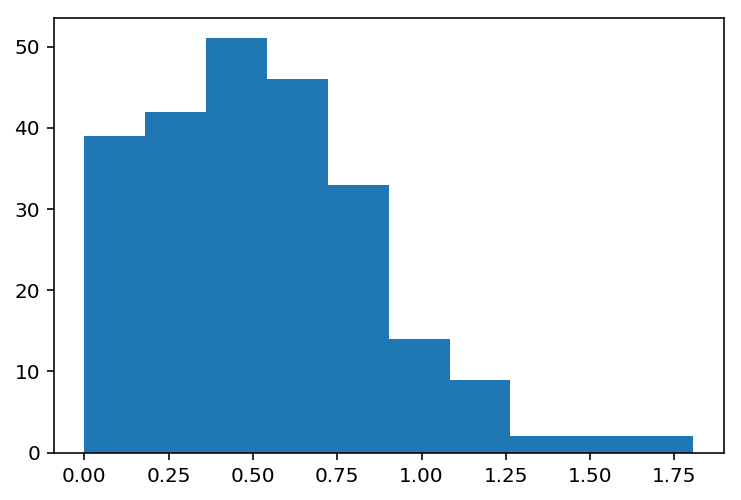

In [477]:
# Histograma de d2d - Números de objetos x distâcia em função de Ra e Dec 
plt.hist(d2d)

(array([  1.,   6.,  13.,  14.,  17.,  26.,  22.,  36.,  42.,  63.]),
 array([  0.4839107 ,   1.93475407,   3.38559745,   4.83644082,
          6.28728419,   7.73812757,   9.18897094,  10.63981431,
         12.09065769,  13.54150106,  14.99234443]),
 <a list of 10 Patch objects>)

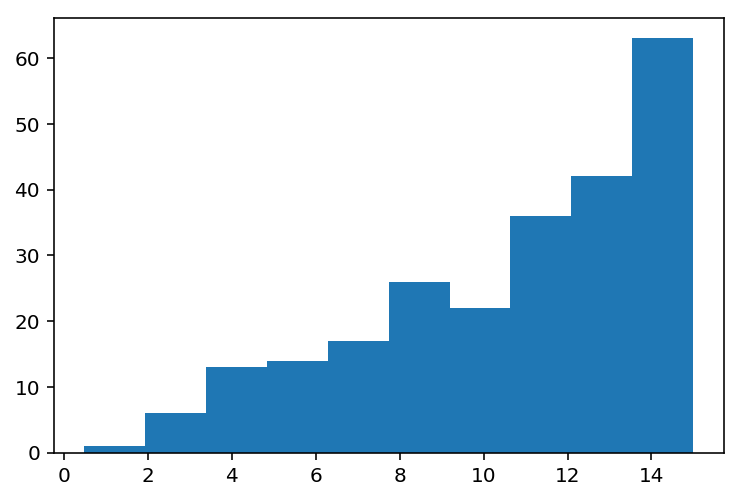

In [478]:
# Histograma de d3d - Números de objetos x distâcia em função de Ra, Dec e z
plt.hist(d3d)

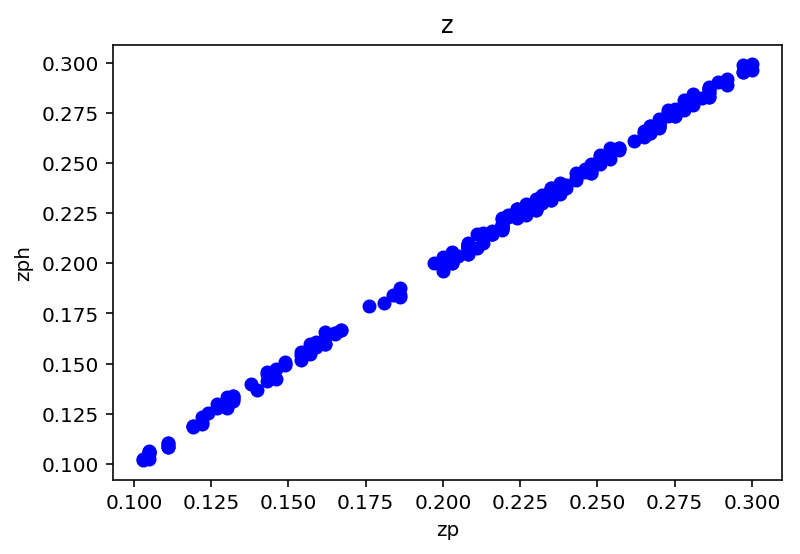

In [479]:
# Plot z vs z
iwz = wz[idxc_wz]
ik = k[idxc_k]
zwz = iwz['zp']
zk = ik['zph']
fig = plt.figure(1)
ax = fig.add_subplot(111)
plt. plot(zk,zwz, 'bo')
plt.xlabel('zp')
plt.ylabel('zph')
plt.title('z')

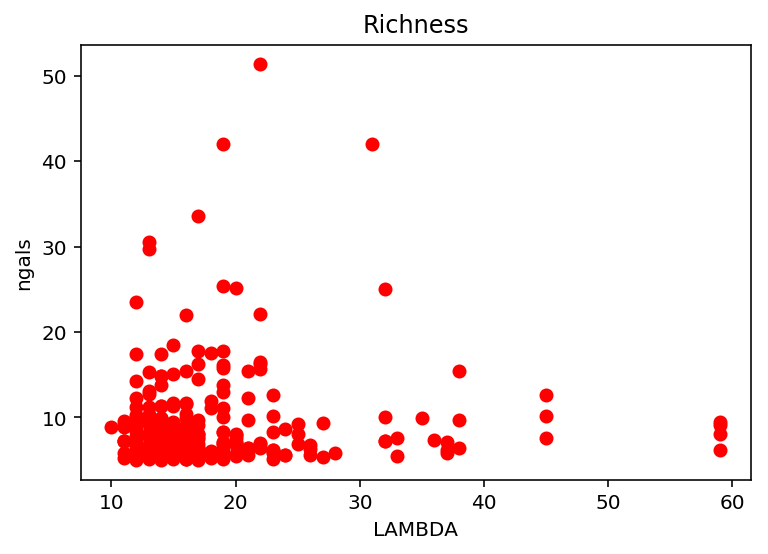

In [480]:
# Plor rich vs rich
rwz = iwz['ngals']
rk = ik['Ngal']
fig = plt.figure(1)
ax = fig.add_subplot(111)
plt. plot(rk,rwz, 'ro')
plt.xlabel('LAMBDA')
plt.ylabel('ngals')
plt.title('Richness')

(0, 10)

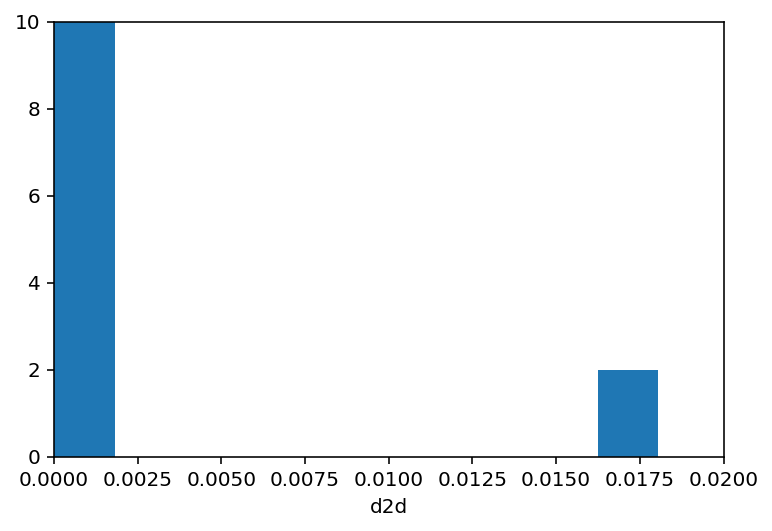

In [481]:
plt.hist(d2d, bins=1000)
plt.xlabel('d2d')
plt.xlim(0,0.02)
plt.ylim(0,10)

In [482]:
print len(np.unique(idxc_k))
print len(np.unique(idxc_wz))
print len(idxc_k[d2d<0.002*u.deg])
print len(idxc_wz[d2d<0.002*u.deg])

obje_kwz = idxc_k[d2d<0.002*u.deg]
obje_wzk = idxc_wz[d2d<0.002*u.deg]

o_kwz = k[obje_kwz]
o_wzk = wz[obje_wzk]

ra_kwz = o_kwz['RAJ2000']
dec_kwz = o_kwz['DEJ2000']
z_kwz = o_kwz['zph']

ra_wzk = o_wzk['ra']
dec_wzk = o_wzk['dec']
z_wzk = o_wzk['zp']

149
201
10
10


# Diagrama de Venn

In [483]:
# Formatando o Wen
Ra_w = w['RAJ2000']
Dec_w = w['DEJ2000']
z_w = w['zph']

lista_w = []
for i in range(0,len(w)):
    lista_w.append('%.1f_%.1f_%.1f'%(Ra_w[i], Dec_w[i], z_w[i]))
print len(lista_w)

1805


In [484]:
# Formatando o Rykoff
Ra_r = r['RA']
Dec_r = r['DEC']
z_r = r['Z_LAMBDA']

lista_r = []
for i in range(0,len(r)):
    lista_r.append('%.1f_%.1f_%.1f'%(Ra_r[i], Dec_r[i], z_r[i]))
print len(lista_r)

497


In [485]:
# Formatando o Koester
Ra_k = k['RAJ2000']
Dec_k = k['DEJ2000']
z_k = k['zph']

lista_k = []
for i in range(0,len(k)):
    lista_k.append('%.1f_%.1f_%.1f'%(Ra_k[i], Dec_k[i], z_k[i]))
print len(lista_k)

260


In [486]:
# Formatando o Wazp
Ra_wz= wz['ra']
Dec_wz= wz['dec']
z_wz= wz['zp']

lista_wz =[]
for i in range(0,len(wz)):
    lista_wz.append('%.1f_%.1f_%.1f'%(Ra_wz[i],Dec_wz[i], z_wz[i]))
print len(lista_wz)

10073
